In [1]:
from tensorflow import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D, AvgPool2D # new!
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = random.randint(0,60000)

# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]

# Print the label, for random example
print ("y [" + str(img_index) + "]= " + str(label_index) + " " +(fashion_mnist_labels[label_index]))


y [43087]= 2 Pullover


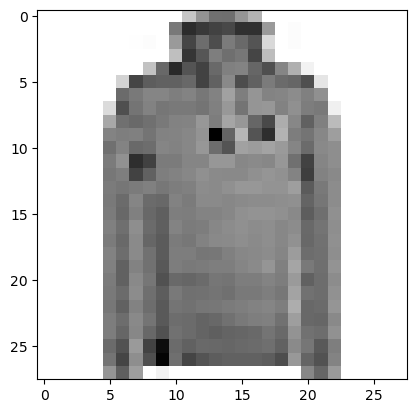

In [4]:
# Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='gray_r')

In [5]:
# A single pixel is of type Integer / values 0..255
print ("Ein Pixel aus der Mitte des Bildes. Datentyp:\t" , type (x_train[img_index][12][12]), "\nWert (0..255):\t\t\t\t\t", x_train[img_index][12][12])

Ein Pixel aus der Mitte des Bildes. Datentyp:	 <class 'numpy.uint8'> 
Wert (0..255):					 111


In [6]:
# A complete image is stored as numpy Array
type (x_train[img_index])

numpy.ndarray

In [7]:
# We received 28x28 pixel images
x_train[img_index].shape

(28, 28)

In [8]:
# In PyCharm we can display this 28x28 Image showing its Integer Numbers
x_train[img_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57, 108,
        143, 144, 106,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 211, 197,
        188, 183, 207, 206, 101,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   3,   0, 101, 186, 146,
        178, 132, 150, 171,  38,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 202, 169,
        129, 144, 136, 186,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  61, 151, 213, 171, 188,
        150, 127, 124, 153, 176, 122,  80,  13,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  43, 186, 162, 158, 158, 151, 188,
        157, 118, 178, 158, 132, 148, 153, 176,  26,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# We want to reshape all 60.000 images (and 10.000 test images) in order to give them one color-layer (not 3 color layers)
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [10]:
# We normalize Gray Scale to float 0..1
x_train /= 255
x_test /= 255

In [11]:
# We now have an extra dimension for the gray layer.
# The numbers stored ar floats
#type(x_train[img_index][12][12][0])
print ("Ein Pixel aus der Mitte des Bildes. Datentyp:\t" , type (x_train[img_index][12][12][0]), "\nWert (0..255):\t\t\t\t\t", x_train[img_index][12][12][0])

Ein Pixel aus der Mitte des Bildes. Datentyp:	 <class 'numpy.float32'> 
Wert (0..255):					 0.43529412


In [12]:
# An image is still an numpy array
type(x_train[img_index])

numpy.ndarray

In [13]:
# Shape of a single image no longer is 28x28 but 28x28x1 (the gray layer)
x_train[img_index].shape

(28, 28, 1)

In [14]:
# we still can display this gray layer in PyCharm
x_train[img_index].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.22352941, 0.42352942, 0.56078434, 0.5647059 ,
        0.41568628, 0.29803923, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5254902 , 0.827451  , 0.77254903, 0.7372549 , 0.7176471 ,
        0.8117647 , 0.80784315, 0.39607844, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.01176471, 0.        ,
        0.39607844, 0.7294118 , 0.57254905, 0.69803923, 0.5176471 ,
        0.5882353 , 0.6705

In [15]:
# We need to one-hot-encode our Y values
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [16]:
# a simple LeNet implementation as found on d2l.ai
model = Sequential([
            Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28,28,1)),
            AvgPool2D(pool_size=2, strides=2),
            Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
            AvgPool2D(pool_size=2, strides=2),
            Flatten(),
            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(n_classes, activation='softmax')])

In [17]:
# we can display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

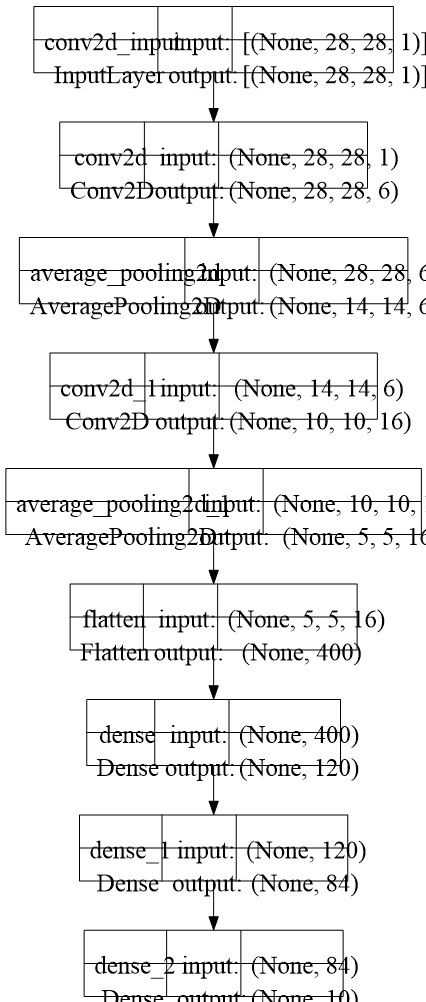

In [18]:
# Tensorflow allows to creat a visual representation of our model.
from keras.utils import plot_model

plot_model(model, to_file='../img/model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
### Optional - Hierfür müssen zusätzliche Software und Bibliotheken installiert werden.

# import visualkeras
# from PIL import ImageFont

# font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!

# visualkeras.layered_view(model, legend=True, font=font, scale_xy=10, scale_z=4, max_z=500)  # font is optional!


In [20]:
# we define two so called "callback" object.
# these objects can be injected to the training process.
# here: 
#   - the checkpointer callback collects the bestperforming model and stores the respective model parameters
#   - the history callback collects all metrics from all epochs
from keras.callbacks import ModelCheckpoint
from keras.callbacks import History

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)                     
history = History()

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
result = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1
                   #, validation_data=(x_valid, y_valid)
                   , validation_split=0.2
                   , callbacks = [history, checkpointer])

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 1.5937 - acc: 0.4216
Epoch 1: val_loss improved from inf to 0.88412, saving model to model.weights.best.hdf5
375/375 [==============================] - 16s 41ms/step - loss: 1.5937 - acc: 0.4216 - val_loss: 0.8841 - val_acc: 0.6587
Epoch 2/50
374/375 [============================>.] - ETA: 0s - loss: 0.7685 - acc: 0.7124
Epoch 2: val_loss improved from 0.88412 to 0.67962, saving model to model.weights.best.hdf5
375/375 [==============================] - 13s 34ms/step - loss: 0.7680 - acc: 0.7125 - val_loss: 0.6796 - val_acc: 0.7468
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 0.6494 - acc: 0.7495
Epoch 3: val_loss improved from 0.67962 to 0.63323, saving model to model.weights.best.hdf5
375/375 [==============================] - 13s 35ms/step - loss: 0.6494 - acc: 0.7495 - val_loss: 0.6332 - val_acc: 0.7592
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 0.5974 - acc: 0.

In [23]:
history.history['loss']

[1.593667984008789,
 0.7680436372756958,
 0.6494475603103638,
 0.5974225401878357,
 0.5577630400657654,
 0.5219702124595642,
 0.48795971274375916,
 0.45954629778862,
 0.43748772144317627,
 0.4208310544490814,
 0.4093807339668274,
 0.3988383114337921,
 0.3887631893157959,
 0.3767186403274536,
 0.36712419986724854,
 0.3601692318916321,
 0.35158100724220276,
 0.3455561399459839,
 0.3404955267906189,
 0.33342835307121277,
 0.3314230144023895,
 0.32321375608444214,
 0.31861913204193115,
 0.3138052225112915,
 0.30911147594451904,
 0.30698004364967346,
 0.30310991406440735,
 0.29889771342277527,
 0.296281099319458,
 0.29196226596832275,
 0.28836095333099365,
 0.2865918278694153,
 0.28198879957199097,
 0.27868613600730896,
 0.2787071764469147,
 0.2751440703868866,
 0.2731977105140686,
 0.2693242132663727,
 0.26804399490356445,
 0.26514607667922974,
 0.26413655281066895,
 0.26117685437202454,
 0.256991446018219,
 0.2547875642776489,
 0.25332850217819214,
 0.2520275413990021,
 0.2473800182342529

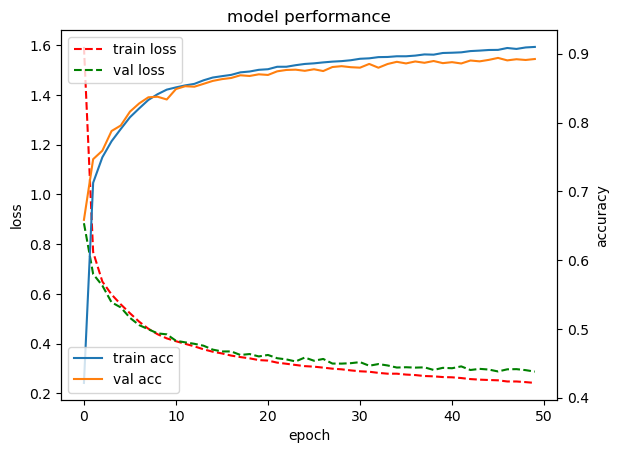

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(history.history['loss'], color='red', linestyle='--')
ax1.plot(history.history['val_loss'], color='green', linestyle='--')
plt.title('model performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss', 'train acc', 'varl acc'], loc='upper left')

ax2 = ax1.twinx()

ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
ax2.set_ylabel('accuracy')
ax2.legend(['train acc', 'val acc'], loc='lower left')

In [25]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [26]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8898000121116638


In [27]:
y_hat = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


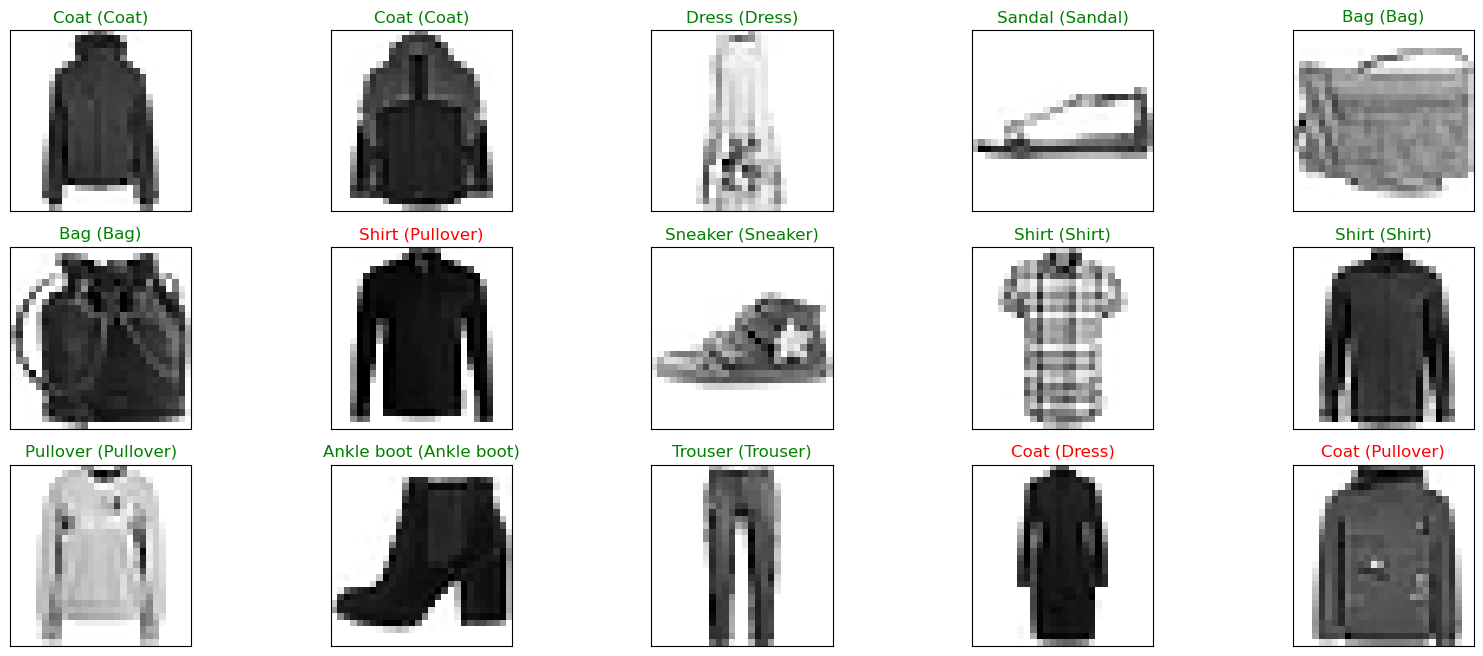

In [28]:
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='gray_r')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))